# CSX46 Homework Assignment 2

### JuHyun Kim



In this homework assignment you will be analyzing a gene regulatory network for the bacterial model species *E.&nbsp;coli*.


Install cairo and igraph; import cairo, igraph, pandas, matplotlib, numpy, random, and itertools

In [2]:
!apt-get install libcairo2-dev libjpeg-dev libgif-dev
!pip install pycairo
import cairo
!pip install python-igraph
import igraph
import pandas as pd
import matplotlib
import numpy as np
import random, itertools

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libgif-dev is already the newest version (5.1.9-2build2).
libgif-dev set to manually installed.
libjpeg-dev is already the newest version (8c-2ubuntu10).
libjpeg-dev set to manually installed.
The following additional packages will be installed:
  libblkid-dev libcairo-script-interpreter2 libffi-dev libglib2.0-dev libglib2.0-dev-bin libice-dev
  liblzo2-2 libmount-dev libpixman-1-dev libselinux1-dev libsepol-dev libsm-dev libxcb-render0-dev
  libxcb-shm0-dev
Suggested packages:
  libcairo2-doc libgirepository1.0-dev libglib2.0-doc libgdk-pixbuf2.0-bin | libgdk-pixbuf2.0-dev
  libxml2-utils libice-doc libsm-doc
The following NEW packages will be installed:
  libblkid-dev libcairo-script-interpreter2 libcairo2-dev libffi-dev libglib2.0-dev
  libglib2.0-dev-bin libice-dev liblzo2-2 libmount-dev libpixman-1-dev libselinux1-dev libsepol-dev
  libsm-dev libxcb-render0-dev libxcb-shm0-dev
0 upgrad

You will also need to download the file `ecolitfnet.txt` from the CSX46 S3 bucket, from the URL [https://csx46.s3-us-west-2.amazonaws.com/ecolitfnet.txt](https://csx46.s3-us-west-2.amazonaws.com/ecolitfnet.txt). In case you want to check that you have a complete and uncorrupted version of the file, here is it's MD5 checksum: 89d3688fca40e34cff23f4c2b703e427.

In [5]:
!wget https://csx46.s3-us-west-2.amazonaws.com/ecolitfnet.txt -O ecolitfnet.txt

--2024-02-23 21:06:52--  https://csx46.s3-us-west-2.amazonaws.com/ecolitfnet.txt
Resolving csx46.s3-us-west-2.amazonaws.com (csx46.s3-us-west-2.amazonaws.com)... 52.92.225.210, 52.218.152.121, 3.5.80.161, ...
Connecting to csx46.s3-us-west-2.amazonaws.com (csx46.s3-us-west-2.amazonaws.com)|52.92.225.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2381 (2.3K) [text/plain]
Saving to: ‘ecolitfnet.txt’

ecolitfnet.txt      100%[===================>]   2.33K  --.-KB/s    in 0s      

2024-02-23 21:06:52 (33.1 MB/s) - ‘ecolitfnet.txt’ saved [2381/2381]



For consistency of results, go ahead and set the random number seed to 1337

In [6]:
random.seed(1337)

Load in the *E.&nbsp;coli* operon-operon network (gene regulatory network) data in edge-list format; display the first six lines of data as a sanity check. Use `pandas.read_csv` and `pandas.DataFrame.head`.

In [7]:
edge_list_df = pd.read_csv("ecolitfnet.txt", sep="\t", names=["source","target"])
edge_list_df.shape
edge_list_df.head(n=6)

,source,target
0,ADA,AIDB
1,ADIY,GADX
2,ALLR,ALLS
3,ARCA,BETI
4,ARCA,DPIA
5,ARCA,FNR


Make an igraph directed graph from the network; print a graph summary as a sanity check.  You will need to use `igraph.Graph.TupleList` and `summary`.

In [8]:
edge_list_graph = igraph.Graph.TupleList(edge_list_df[["source","target"]].values.tolist(), directed=True)
edge_list_graph.summary()

'IGRAPH DN-- 133 261 -- \n+ attr: name (v)'

# Part I: Three-vertex motif analysis

## Question 1

_There are 13 different types of connected 3-vertex motifs (“isomorphism classes”) for a digraph. Which one of these motifs is most frequent in the E. coli regulatory network?_

Obtain the counts of all three-vertex motifs in the graph. You will need to use the `motifs_randesu` method in `igraph.Graph`.

In [21]:
motif_counts = edge_list_graph.motifs_randesu(size=3,cut_prob = None, callback = None)
max_motif_count = np.nanmax(motif_counts)

print("the most frequently occuring three-vertex motif is motif class:",motif_counts.index(max_motif_count))
print("which had a count of", max_motif_count)

the most frequently occuring three-vertex motif is motif class: 6
which had a count of 1676.0


## Answer to Question 1:
From looking at the position in the list of motif counts, the most frequently occuring three-vertex motif is motif "Class 6", which had a count of 1,676.

## Question 2, part A

_Which one of these motifs has a count of 47 in the regulatory network?_

## Answer to Question 2, part A

From the results above, the motif with count 47 on the "real graph" is Class 7. Manually create an `igraph.Graph` directed graph object with three vertices, and then plot the graph. Make sure that the graph that you created looks like the three-vertex "Class 7" motif graph shown in the Canvas assignment for this homework.

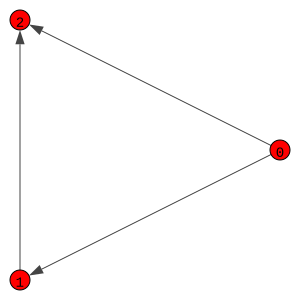

In [87]:
g = igraph.Graph(directed=True)

# Add 3 vertice
g.add_vertices(3)

# Add edges according to the "Class 7" motif
# The motif has a triangle shape with one vertex pointing to both of the other two
g.add_edges([(0, 1), (1, 2), (0, 2)])

# Define the layout
layout = g.layout_circle()  # This places the vertices in a circular layout

# Plot the graph
igraph.plot(g, layout=layout, vertex_label=range(g.vcount()), bbox=(300, 300), margin=20)

Now, call the `igraph.Graph.isoclass` method on the three-vertex igraph graph that you just created. It should return 7.

In [55]:
# print the isomorphism class
edge_list_graph.motifs_randesu(size = 3, cut_prob = None, callback = None).index(47)


7

## Question 2, part B

_What are the mean and standard deviation of the MM counts for the 10,000 random networks?_

Get motif counts for 10,000 different randomizations of the network.  You will need to use a `for` loop, `igraph.Graph.copy`, `igraph.Graph.rewire`, and `append`.  You can specify n=1000 for the rewiring.  You can use `itertools.repeat` to perform 10,000 loops if you like.

In [41]:
real_motif_counts = edge_list_graph.motifs_randesu(size=3)  #original motif counts
random_motif_counts = []
for i in range(10000):
  random_graph = edge_list_graph.copy()
  random_graph.rewire(n=1000)
  random_motif_counts.append(random_graph.motifs_randesu(size=3))
random_motif_counts = np.array(random_motif_counts)

For each motif type, compute the mean and standard deviation of the counts of appearances of the motif in each of the 10,000 randomly rewired graphs. You will need to use the `numpy.mean` and `numpy.std` functions.

In [56]:
mean_random_motifs = np.mean(random_motif_counts, axis=0)
standard_random_motifs = np.std(random_motif_counts, axis=0)
print("mean random motifs: ", mean_random_motifs)
print("standard random motif: ", standard_random_motifs)

mean random motifs:  [          nan           nan 3.6129130e+02           nan 3.0314960e+02
 6.8842000e+00 1.7642071e+03 5.7281500e+01 6.2660000e-01 1.8723700e+01
 4.9700000e-02 7.9200000e-01 3.4020000e-01 8.7130000e-01 1.4300000e-02
 0.0000000e+00]
standard random motif:  [        nan         nan 10.92273978         nan 27.32552689  7.32991067
 22.4506884   9.25421297  1.07115472 21.41175281  0.23287316  0.9630867
  0.74489191  1.97897355  0.1203973   0.        ]


Print out the mean and the standard deviation of the numbers of feed-forward loops (FFLs) in random networks. Print the number of FFLs on the real network. The FFL should be at index position 7 (starting from zero!) of the vector returned from `motifs_randesu`.

## Answer to Question 2, Part B

In [44]:
ffl_index = 7
mean_ffl_random = mean_random_motifs[ffl_index]
standard_ffl_random = standard_random_motifs[ffl_index]
real_ffl_count = real_motif_counts[ffl_index]

print(f"Mean FFL count in random networks: {mean_ffl_random}")
print(f"Standard deviation of FFL count in random networks: {standard_ffl_random}")
print(f"FFL count in the real network: {real_ffl_count}")


Mean FFL count in random networks: 57.2815
Standard deviation of FFL count in random networks: 9.254212973019344
FFL count in the real network: 47


## Question 3

_What is the Z-score for enrichment of the MM count for the real network vs. the ensemble of random networks?  Does this Z-score correspond to a statistically significant positive enrichment?_

For each motif type, obtain the *Z* score for the number of appearances of the motif in the real network, vs. in the randomly rewired networks. Note, some of the motif counts are all zero, so we will set NumPy to ignore divide-by-zero errors before we do the vector element-wise division operation.

In [60]:
np.seterr(divide='ignore')

# add code to compute the z-score
z_score = (47 - mean_random_motifs) / standard_random_motifs


Print the _z_-score for the FFL

## Answer to Question 3

In [61]:
z_score_ffl = z_score[ffl_index]
print(f"Z-score for FFL motif enrichment: {z_score_ffl}")

Z-score for FFL motif enrichment: -1.1110074978796913


## Question 4.

_What is the ratio of the MM count for the real network to the average MM count for the random networks?_

Print out the ratio of the FFL count for the real network, to the average FFL count for the random networks

## Answer to Question 4

In [65]:
ffl_ratio = 47/mean_ffl_random
ffl_ratio

0.8205092394577655

## Question 5.

_How does ratio compare to the same ratio for the data in Table 1 in Shen-Orr et al., Nature Genetics, 2002?_

Adding up the first two rows of Table 1 in Shen-Orr et al., we get a count of 40 FFLs in the real network vs. an average of 6.9 in the randomized networks. Print the ratio:

## Answer to Question 5

In [83]:
#Table1 in Shen-Orr et al.
#Structure                    (mean ± s.d.)    P value
#Coherent feedforward loop 34   4.4 ± 3        P < 0.001
#Incoherent feedforward loop 6  2.5 ± 2        P ∼ 0.03

shen_orr_real_ffl_count = 34+6  #40
shen_orr_random_ffl_mean = 4.4+2.5

# Ratio from Shen-Orr et al.
shen_orr_ratio = shen_orr_real_ffl_count / shen_orr_random_ffl_mean

print(f"Shen-Orr et al. ratio: {shen_orr_ratio}")
print(f"mine ffl ratio: {ffl_ratio}")

Shen-Orr et al. ratio: 5.797101449275362
mine ffl ratio: 0.8205092394577655


## Question 6

_Given the modest ratio of the MM frequency in the real network vs. randomly shuffled network, should we entertain the possibility that the high frequency of MMs in the real network could be a consequence of the degree distribution rather than evolution specifically “favoring” FFLs as a building block for gene regulatory networks?_

## Answer to Question 6:


Yes, If the frequency of FFLs in the real network is only modestly higher than in randomized networks that preserve the degree distribution, this could suggest that the degree distribution itself may play a significant role in the emergence of such motifs. In other words, it may not necessarily be that evolution is selecting for FFLs specifically; rather, FFLs could be a byproduct of the way that genes tend to regulate each other in a network with a particular degree distribution.

# Part II. Four-vertex motif analysis

## Question 1

_What is the count of this four-vertex motif in the E. coli gene regulatory network?_

Figure out the isomorphism class of the network shown in the assignment in Canvas.  You'll want to build an edge-list tuple-list and then an igraph `Graph` object using `Graph.TupleList` (make sure to specify a directed graph!), and then use the `igraph.Graph.isoclass` method.

In [70]:
four_vertex_motif = igraph.Graph.TupleList([(1,3),(1,4),(2,3),(2,4)], directed=True)
four_vertex_motif.isoclass()

19

Compute the number of appearances of this four-vertex motif in the real network, using `motifs` with `size=4`.

## Answer to Question 1

In [75]:
edge_list_graph.motifs_randesu(size=4)[19]

297

## Question 2

_What are the average (and standard deviation) of the counts of this motif in 10,000 randomly shuffled networks?_

(you can compute this similarly to what you did for the three- vertex motifs above).

Get the mean and standard deviation for the count of four-vertex motifs in 10,000 randomly rewired graphs.  You will need to use a `for` loop, `igraph.Graph.copy`, `igraph.Graph.rewire`, and `list.append`.  You can specify *n*=1,000 for the rewiring.

In [76]:
four_ver_motif_count = []
for i in range(10000):
  random_graph = edge_list_graph.copy()
  random_graph.rewire(n=1000)
  four_ver_motif_count.append(random_graph.motifs_randesu(size=4)[19])

four_ver_motif_count = np.array(four_ver_motif_count)


Use `numpy.mean` and `numpy.stdev` to compute the mean and standard deviation of the counts of this motif on the randomly rewired graphs.

## Answer to Question 2

In [77]:
mean_four_ver_motif = np.mean(four_ver_motif_count)
std_four_ver_motif = np.std(four_ver_motif_count)

## Question 3

_What is the *Z*-score for enrichment of this four-vertex motif?  Is it significant?_

Print out the mean number of 4-vertex dense overlapping region (DOR) motifs for the random networks, the standard deviation, and the *Z* score for the DOR motif count in the real graph vs. the random graphs. You'll need to use `numpy.array`, `numpy.mean`, and `numpy.std`.

## Answer to Question 3

In [78]:
real_four_ver_motif = edge_list_graph.motifs_randesu(size=4)[19]
z_four_ver_motif = (real_four_ver_motif - mean_four_ver_motif) / std_four_ver_motif

# Print the results
print(f"Mean count in random networks: {mean_four_ver_motif}")
print(f"Standard deviation in random networks: {std_four_ver_motif}")
print(f"Count in the real network: {real_four_ver_motif}")
print(f"Z-score for enrichment: {z_four_ver_motif}")

Mean count in random networks: 176.8852
Standard deviation in random networks: 37.894712308711355
Count in the real network: 297
Z-score for enrichment: 3.169698163202248


## Question 4

_What is the ratio of the count in the real network to the average count for the random networks?  How does this ratio compare to the ratio that you obtain from Table 1 from Shen-Orr et al.? Are they consistent? Does this suggest that Shen-Orr’s actual network randomization procedure is possibly not consistent with their description in the Methods section of their paper, i.e., that it may have had some kind of error? (if you are interested in this topic, see the paper by Konagurthu and Lesk, BMC Systems Biology, 2008, 2:73 [Konagurthu_BMCSystBiol_2008.pdf](https://drive.google.com/file/d/1yO-ZXc0SZpwsLFyr_14n3AsP1T-PjAYu/view?usp=share_link)_

## Answer to Question 4

In [79]:
ratio_real = 297/mean_four_ver_motif
ratio_real

1.679055115973524

In [82]:
#Table1
#Paris of operons regulated by same two transcription factors
shen_ratio = 203/57
shen_ratio

3.56140350877193

The ratio is 1.679 of the count in the real network to average count for the random networks I got.
The ratio from Shen-Orr et al. Table 1 is 3.561.
The difference between the two ratios shows that the overrepresentation of the four-vertex motif in the real network is less pronounced than the structures studied by paper. Consequently, without analyzing the same motif types and employing identical network randomization procedures, it is not possible to draw firm conclusions about the consistency of paper's randomization methodology or the evolutionary significance of the motifs in question.   

